In [1]:
cd drive/My\ Drive/concrete_crack

/content/drive/My Drive/concrete_crack


In [2]:
import numpy as np
import os
from sklearn.metrics import mean_squared_error as mse
from skimage.metrics import structural_similarity as ssim 
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, classification_report
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import pandas as pd

In [5]:
cd data_28/

/content/drive/My Drive/concrete_crack/data_28


In [6]:
ls

rescaled_negative_data.npy  X_test_negative.npy
rescaled_positive_data.npy  X_test_positive_balanced.npy
X_test_balanced.npy         X_test_positive_imbalanced.npy
X_test_imbalanced.npy       X_train.npy


In [0]:
X_test_balanced_28 = np.load('X_test_balanced.npy', allow_pickle=True)

In [0]:
X_test_imbalanced_28 = np.load('X_test_imbalanced.npy', allow_pickle=True)

In [9]:
cd ..

/content/drive/My Drive/concrete_crack


In [10]:
cd encoded_decoded_data_28/

/content/drive/My Drive/concrete_crack/encoded_decoded_data_28


In [0]:
decoded_files = [i for i in os.listdir(os.getcwd()) if 'dec' in i]

In [12]:
decoded_files

['dec1_b_28.npy',
 'dec2_b_28.npy',
 'dec3_b_28.npy',
 'dec1_i_28.npy',
 'dec2_i_28.npy',
 'dec3_i_28.npy',
 'dec4_b_28.npy',
 'dec4_i_28.npy']

In [0]:
dec1_b_28 = np.load(decoded_files[0], allow_pickle=True)
dec2_b_28 = np.load(decoded_files[1], allow_pickle=True)
dec3_b_28 = np.load(decoded_files[2], allow_pickle=True)
dec1_i_28 = np.load(decoded_files[3], allow_pickle=True)
dec2_i_28 = np.load(decoded_files[4], allow_pickle=True)
dec3_i_28 = np.load(decoded_files[5], allow_pickle=True)
dec4_b_28 = np.load(decoded_files[6], allow_pickle=True)
dec4_i_28 = np.load(decoded_files[7], allow_pickle=True)

In [14]:
cd ..

/content/drive/My Drive/concrete_crack


In [15]:
cd data_64/

/content/drive/My Drive/concrete_crack/data_64


In [0]:
X_test_balanced_64 = np.load('X_test_balanced.npy', allow_pickle=True)
X_test_imbalanced_64 = np.load('X_test_imbalanced.npy', allow_pickle=True)

In [17]:
cd ..

/content/drive/My Drive/concrete_crack


In [18]:
cd encoded_decoded_data_64/

/content/drive/My Drive/concrete_crack/encoded_decoded_data_64


In [0]:
decoded_files = [i for i in os.listdir(os.getcwd()) if 'dec' in i]

In [20]:
decoded_files

['dec1_i_64.npy',
 'dec2_i_64.npy',
 'dec3_i_64.npy',
 'dec1_b_64.npy',
 'dec2_b_64.npy',
 'dec3_b_64.npy',
 'dec4_i_28.npy',
 'dec4_b_64.npy',
 'dec4_i_64.npy']

In [0]:
dec4_i_64 = np.load(decoded_files[8], allow_pickle=True)
dec4_b_64 = np.load(decoded_files[7], allow_pickle=True)
dec3_b_64 = np.load(decoded_files[5], allow_pickle=True)
dec2_b_64 = np.load(decoded_files[4], allow_pickle=True)
dec1_b_64 = np.load(decoded_files[3], allow_pickle=True)
dec3_i_64 = np.load(decoded_files[2], allow_pickle=True)
dec2_i_64 = np.load(decoded_files[1], allow_pickle=True)
dec1_i_64 = np.load(decoded_files[0], allow_pickle=True)

In [0]:
def compute_mse(data1, data2):
  score = []
  for i,j in zip(data1, data2):
    error = mse(i.flatten(), j.flatten())
    score.append(error)
  return np.array(score)

In [0]:
mse_balanced_28_1 = compute_mse(X_test_balanced_28, dec1_b_28)
mse_imbalanced_28_1 = compute_mse(X_test_imbalanced_28, dec1_i_28)

mse_balanced_28_2 = compute_mse(X_test_balanced_28, dec2_b_28)
mse_imbalanced_28_2 = compute_mse(X_test_imbalanced_28, dec2_i_28)

mse_balanced_28_3 = compute_mse(X_test_balanced_28, dec3_b_28)
mse_imbalanced_28_3 = compute_mse(X_test_imbalanced_28, dec3_i_28)

mse_balanced_28_4 = compute_mse(X_test_balanced_28, dec4_b_28)
mse_imbalanced_28_4 = compute_mse(X_test_imbalanced_28, dec4_i_28)

In [0]:
mse_balanced_64_1 = compute_mse(X_test_balanced_64, dec1_b_64)
mse_imbalanced_64_1 = compute_mse(X_test_imbalanced_64, dec1_i_64)

mse_balanced_64_2 = compute_mse(X_test_balanced_64, dec2_b_64)
mse_imbalanced_64_2 = compute_mse(X_test_imbalanced_64, dec2_i_64)

mse_balanced_64_3 = compute_mse(X_test_balanced_64, dec3_b_64)
mse_imbalanced_64_3 = compute_mse(X_test_imbalanced_64, dec3_i_64)

mse_balanced_64_4 = compute_mse(X_test_balanced_64, dec4_b_64)
mse_imbalanced_64_4 = compute_mse(X_test_imbalanced_64, dec4_i_64)

In [0]:
balanced_normal_label = np.array([0]*4000)
balanced_anomalous_label = np.array([1]*4000)
balanced_label = np.concatenate([balanced_normal_label, balanced_anomalous_label])

In [0]:
imbalanced_normal_label = np.array([0]*4000)
imbalanced_anomalous_label = np.array([1]*500)
imbalanced_label = np.concatenate([imbalanced_normal_label, imbalanced_anomalous_label])

# Model Evaluation for Balanced Data using AUROC

In [0]:
fpr_b_28_1, tpr_b_28_1, thr_b_28_1 = roc_curve(balanced_label, mse_balanced_28_1)
roc_auc_b_28_1 = auc(fpr_b_28_1, tpr_b_28_1)

fpr_b_28_2, tpr_b_28_2, thr_b_28_2 = roc_curve(balanced_label, mse_balanced_28_2)
roc_auc_b_28_2 = auc(fpr_b_28_2, tpr_b_28_2)

fpr_b_28_3, tpr_b_28_3, thr_b_28_3 = roc_curve(balanced_label, mse_balanced_28_3)
roc_auc_b_28_3 = auc(fpr_b_28_3, tpr_b_28_3)

fpr_b_28_4, tpr_b_28_4, thr_b_28_4 = roc_curve(balanced_label, mse_balanced_28_4)
roc_auc_b_28_4 = auc(fpr_b_28_4, tpr_b_28_4)

In [0]:
fpr_b_64_1, tpr_b_64_1, thr_b_64_1 = roc_curve(balanced_label, mse_balanced_64_1)
roc_auc_b_64_1 = auc(fpr_b_64_1, tpr_b_64_1)

fpr_b_64_2, tpr_b_64_2, thr_b_64_2 = roc_curve(balanced_label, mse_balanced_64_2)
roc_auc_b_64_2 = auc(fpr_b_64_2, tpr_b_64_2)

fpr_b_64_3, tpr_b_64_3, thr_b_64_3 = roc_curve(balanced_label, mse_balanced_64_3)
roc_auc_b_64_3 = auc(fpr_b_64_3, tpr_b_64_3)

fpr_b_64_4, tpr_b_64_4, thr_b_64_4 = roc_curve(balanced_label, mse_balanced_64_4)
roc_auc_b_64_4 = auc(fpr_b_64_4, tpr_b_64_4)

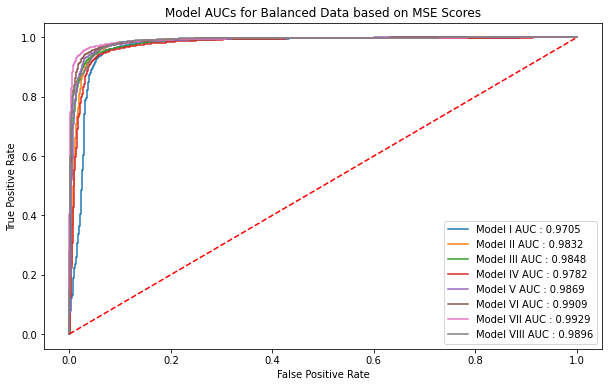

In [33]:
plt.figure(figsize = (10,6))
plt.plot(fpr_b_28_1, tpr_b_28_1, label = 'Model I AUC : %0.4f'%(roc_auc_b_28_1))
plt.plot(fpr_b_28_2, tpr_b_28_2, label = 'Model II AUC : %0.4f'%(roc_auc_b_28_2))
plt.plot(fpr_b_28_3, tpr_b_28_3, label = 'Model III AUC : %0.4f'%(roc_auc_b_28_3))
plt.plot(fpr_b_64_1, tpr_b_64_1, label = 'Model IV AUC : %0.4f'%(roc_auc_b_64_1))
plt.plot(fpr_b_64_2, tpr_b_64_2, label = 'Model V AUC : %0.4f'%(roc_auc_b_64_2))
plt.plot(fpr_b_64_3, tpr_b_64_3, label = 'Model VI AUC : %0.4f'%(roc_auc_b_64_3))
plt.plot(fpr_b_64_4, tpr_b_64_4, label = 'Model VII AUC : %0.4f'%(roc_auc_b_64_4))
plt.plot(fpr_b_28_4, tpr_b_28_4, label = 'Model VIII AUC : %0.4f'%(roc_auc_b_28_4))
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model AUCs for Balanced Data based on MSE Scores')
plt.legend()
plt.show()

As can be seen above, Model VII has the best AUC score with 0.9929

# Model Evaluation for imbalanced data based on MSE

In [0]:
fpr_i_28_1, tpr_i_28_1, thr_i_28_1 = roc_curve(imbalanced_label, mse_imbalanced_28_1)
roc_auc_i_28_1 = auc(fpr_i_28_1, tpr_i_28_1)

fpr_i_28_2, tpr_i_28_2, thr_i_28_2 = roc_curve(imbalanced_label, mse_imbalanced_28_2)
roc_auc_i_28_2 = auc(fpr_i_28_2, tpr_i_28_2)

fpr_i_28_3, tpr_i_28_3, thr_i_28_3 = roc_curve(imbalanced_label, mse_imbalanced_28_3)
roc_auc_i_28_3 = auc(fpr_i_28_3, tpr_i_28_3)

fpr_i_28_4, tpr_i_28_4, thr_i_28_4 = roc_curve(imbalanced_label, mse_imbalanced_28_4)
roc_auc_i_28_4 = auc(fpr_i_28_4, tpr_i_28_4)

fpr_i_64_1, tpr_i_64_1, thr_i_64_1 = roc_curve(imbalanced_label, mse_imbalanced_64_1)
roc_auc_i_64_1 = auc(fpr_i_64_1, tpr_i_64_1)

fpr_i_64_2, tpr_i_64_2, thr_i_64_2 = roc_curve(imbalanced_label, mse_imbalanced_64_2)
roc_auc_i_64_2 = auc(fpr_i_64_2, tpr_i_64_2)

fpr_i_64_3, tpr_i_64_3, thr_i_64_3 = roc_curve(imbalanced_label, mse_imbalanced_64_3)
roc_auc_i_64_3 = auc(fpr_i_64_3, tpr_i_64_3)

fpr_i_64_4, tpr_i_64_4, thr_i_64_4 = roc_curve(imbalanced_label, mse_imbalanced_64_4)
roc_auc_i_64_4 = auc(fpr_i_64_4, tpr_i_64_4)

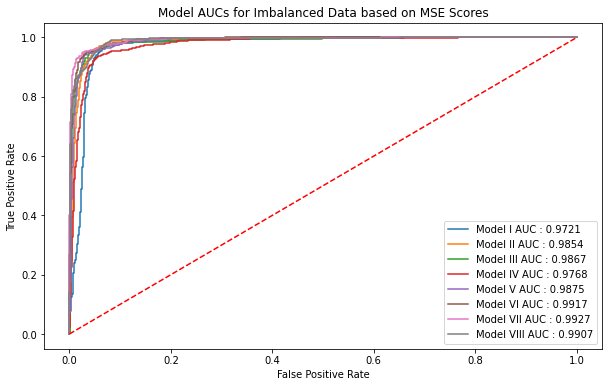

In [32]:
plt.figure(figsize = (10,6))
plt.plot(fpr_i_28_1, tpr_i_28_1, label = 'Model I AUC : %0.4f'%(roc_auc_i_28_1))
plt.plot(fpr_i_28_2, tpr_i_28_2, label = 'Model II AUC : %0.4f'%(roc_auc_i_28_2))
plt.plot(fpr_i_28_3, tpr_i_28_3, label = 'Model III AUC : %0.4f'%(roc_auc_i_28_3))
plt.plot(fpr_i_64_1, tpr_i_64_1, label = 'Model IV AUC : %0.4f'%(roc_auc_i_64_1))
plt.plot(fpr_i_64_2, tpr_i_64_2, label = 'Model V AUC : %0.4f'%(roc_auc_i_64_2))
plt.plot(fpr_i_64_3, tpr_i_64_3, label = 'Model VI AUC : %0.4f'%(roc_auc_i_64_3))
plt.plot(fpr_i_64_4, tpr_i_64_4, label = 'Model VII AUC : %0.4f'%(roc_auc_i_64_4))
plt.plot(fpr_i_28_4, tpr_i_28_4, label = 'Model VIII AUC : %0.4f'%(roc_auc_i_28_4))
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model AUCs for Imbalanced Data based on MSE Scores')
plt.legend()
plt.show()

Here again Model VII has a better AUC with 0.9927

# Precision Recall Curve for Model VII on Balanced Data

In [0]:
precision_b, recall_b, threshold_b = precision_recall_curve(balanced_label, mse_balanced_64_4)

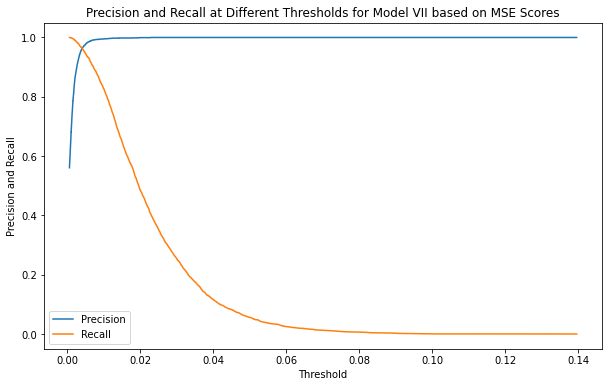

In [35]:

plt.figure(figsize=(10, 6))
plt.plot(threshold_b, precision_b[1:], label = 'Precision')
plt.plot(threshold_b, recall_b[1:], label = 'Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision and Recall')
plt.title('Precision and Recall at Different Thresholds for Model VII based on MSE Scores')
plt.legend()
plt.show()

# Confusion Matrix, Accuracy Score and Classification Report of Model VII based for balanced data

In [0]:
df = pd.DataFrame({'Label' : balanced_label, 'Score' : mse_balanced_64_4})
df = df.sample(frac = 1).reset_index(drop = True)

In [0]:
normal_df = df.loc[df['Label'] == 0]
anomalous_df = df.loc[df['Label'] == 1]

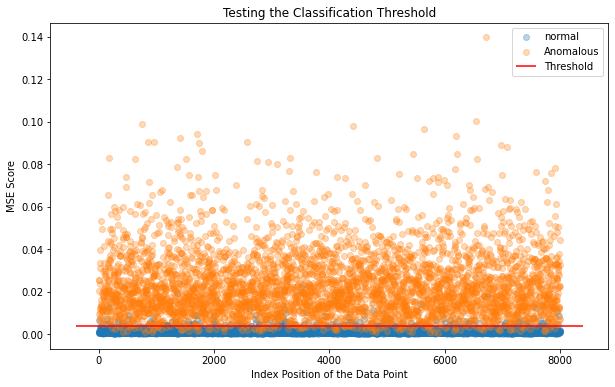

In [70]:
plt.figure(figsize = (10,6))
plt.scatter(normal_df.index, normal_df['Score'], alpha = 0.3, label = 'normal')
plt.scatter(anomalous_df.index, anomalous_df['Score'], alpha = 0.3, label = 'Anomalous')
plt.hlines(0.004, plt.xlim()[0], plt.xlim()[1], colors='r', label = 'Threshold')
plt.xlabel('Index Position of the Data Point')
plt.ylabel('MSE Score')
plt.title('Testing the Classification Threshold')
plt.legend()
plt.show()

In [0]:
predicted_label = [1 if e > 0.004 else 0 for e in mse_balanced_64_4]

In [0]:
conf_mat = confusion_matrix(balanced_label, predicted_label)

In [0]:
df = pd.DataFrame(conf_mat, index = ['Normal', 'Anomalous'], columns = ['Normal', 'Anomalous'])

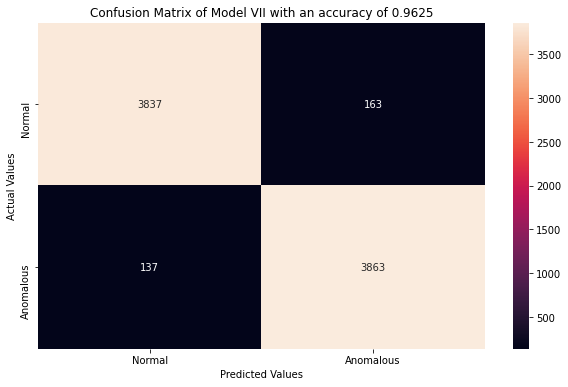

In [69]:
plt.figure(figsize = (10, 6))
sns.heatmap(df, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix of Model VII with an accuracy of %.4f'%accuracy_score(balanced_label, predicted_label))
plt.show()

accuracy occurs at a threshold of 0.004

In [71]:
print('----------------------------------------------------------')
print('                   Classification Report                  ')
print('----------------------------------------------------------')
print(classification_report(balanced_label, predicted_label))

----------------------------------------------------------
                   Classification Report                  
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4000
           1       0.96      0.97      0.96      4000

    accuracy                           0.96      8000
   macro avg       0.96      0.96      0.96      8000
weighted avg       0.96      0.96      0.96      8000



# Precision Recall Curve for Model VII on Imbalanced Data

In [0]:
precision_i, recall_i, threshold_i = precision_recall_curve(imbalanced_label, mse_imbalanced_64_4)

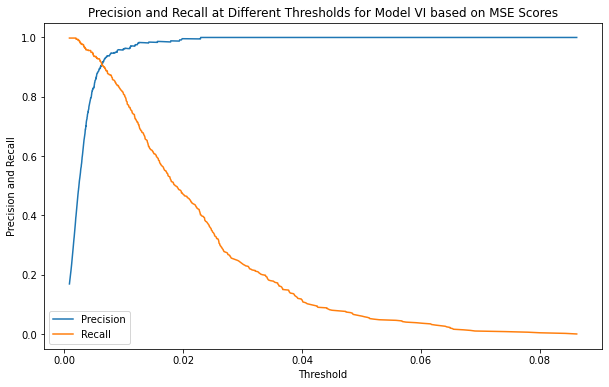

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(threshold_i, precision_i[1:], label = 'Precision')
plt.plot(threshold_i, recall_i[1:], label = 'Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision and Recall')
plt.title('Precision and Recall at Different Thresholds for Model VI based on MSE Scores')
plt.legend()
plt.show()

# Confusion Matrix, Accuracy Score and Classification Report of Model VII based for imbalanced data

In [0]:
df = pd.DataFrame({'Label' : imbalanced_label, 'Score' : mse_imbalanced_64_4})
df = df.sample(frac = 1).reset_index(drop = True)

In [0]:
normal_df = df.loc[df['Label'] == 0]
anomalous_df = df.loc[df['Label'] == 1]

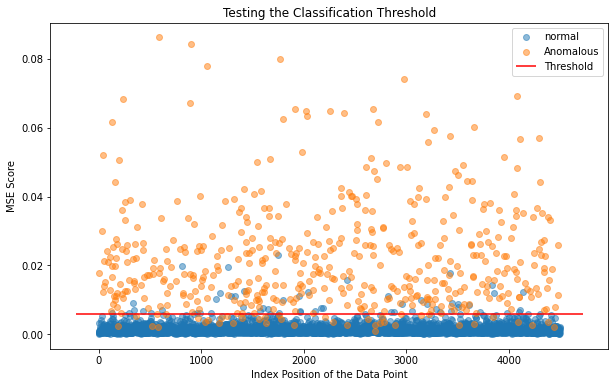

In [108]:
plt.figure(figsize = (10,6))
plt.scatter(normal_df.index, normal_df['Score'], alpha = 0.5, label = 'normal')
plt.scatter(anomalous_df.index, anomalous_df['Score'], alpha = 0.5, label = 'Anomalous')
plt.hlines(0.006, plt.xlim()[0], plt.xlim()[1], colors='r', label = 'Threshold')
plt.xlabel('Index Position of the Data Point')
plt.ylabel('MSE Score')
plt.title('Testing the Classification Threshold')
plt.legend()
plt.show()

In [0]:
predicted_label = [1 if e > 0.006 else 0 for e in mse_imbalanced_64_4]

In [0]:
conf_mat = confusion_matrix(imbalanced_label, predicted_label)

In [0]:
df = pd.DataFrame(conf_mat, index = ['Normal', 'Anomalous'], columns = ['Normal', 'Anomalous'])

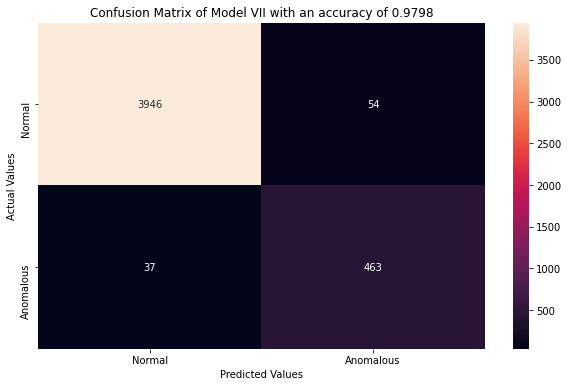

In [112]:
plt.figure(figsize = (10, 6))
sns.heatmap(df, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix of Model VII with an accuracy of %.4f'%accuracy_score(imbalanced_label, predicted_label))
plt.show()

In [113]:
print('----------------------------------------------------------')
print('                   Classification Report                  ')
print('----------------------------------------------------------')
print(classification_report(imbalanced_label, predicted_label))

----------------------------------------------------------
                   Classification Report                  
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4000
           1       0.90      0.93      0.91       500

    accuracy                           0.98      4500
   macro avg       0.94      0.96      0.95      4500
weighted avg       0.98      0.98      0.98      4500



The encoded features from Model VII will be chosen for further evaluation